**카카오 해설**
https://tech.kakao.com/2022/01/14/2022-kakao-recruitment-round-1/
- 합격 커트라인: 4.5솔

1. 구현/문자열/map, set
2. 문자열/소수판별(에라토스테네스의 체)
3. 문자열 파싱/map
4. 완전탐색/백트래킹
5. 완전탐색/백트래킹
6. 누적 합
7. 완전탐색

# 신고 결과 받기
- https://programmers.co.kr/learn/courses/30/lessons/92334

시간 : 15분

In [24]:
# id_list = ["muzi", "frodo", "apeach", "neo"]
id_list = ["con", "ryan"]
# report = ["muzi frodo","apeach frodo","frodo neo","muzi neo","apeach muzi"]
report = ["ryan con", "ryan con", "ryan con", "ryan con"]
# k = 2
k = 3

In [25]:
def solution(id_list, report, k):
    # 신고당한 아이디와 신고한 사람
    warnings = {name:[] for name in id_list}

    for info in report:
        reporter, abuser = info.split()
        if reporter not in warnings[abuser]:
            warnings[abuser].append(reporter)
    # 신고 결과
    result = {name:0 for name in id_list}
    for abuser, reporter in warnings.items():
        if len(reporter) >= k:
            for i in reporter:
                result[i] += 1
                
    return list(result.values())

In [26]:
solution(id_list, report, k)

[0, 0]

**다른 사람 코드**
- set을 써서 중복신고는 최대한 여러번 계산 안하게끔 줄임
- 신고 결과를 횟수로 받고, 신고 횟수가 k가 넘어가는 유저를 index로 신고자에게 전달함

In [32]:
def solution(id_list, report, k):
    answer = [0] * len(id_list)    
    reports = {x : 0 for x in id_list}

    for r in set(report):
        reports[r.split()[1]] += 1

    for r in set(report):
        if reports[r.split()[1]] >= k:
            answer[id_list.index(r.split()[0])] += 1

    return answer

# k진수에서 소수 개수 구하기
- https://programmers.co.kr/learn/courses/30/lessons/92335

시간 : 1시간 10분

## 문제 설명

자연수 n -> k진수로 바꿨을때, 변환된 수 안에 아래 조건에 맞는 소수가 몇 개인지
- 0P0처럼 소수 양쪽에 0이 있는 경우
- P0처럼 소수 오른쪽에만 0이 있고 왼쪽에는 아무것도 없는 경우
- 0P처럼 소수 왼쪽에만 0이 있고 오른쪽에는 아무것도 없는 경우
- P처럼 소수 양쪽에 아무것도 없는 경우
- 단, P는 각 자릿수에 0을 포함하지 않는 소수입니다.
    - 예를 들어, 101은 P가 될 수 없습니다.

n은 최대 100만 -> $(logN)$ or $O(N)$

## 문제 풀이

**Solution**
1. k진수로 바꿔주는 함수 
    - 10진수 -> k진수 변환, n진수 -> 10진수 변환 정리 블로그 (https://velog.io/@code_angler/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%A7%84%EC%88%98%EB%B3%80%ED%99%982%EC%A7%84%EB%B2%95-3%EC%A7%84%EB%B2%95-5%EC%A7%84%EB%B2%95-10%EC%A7%84%EB%B2%95n%EC%A7%84%EB%B2%95)
2. 소수 판별 함수 (처음에 2부터 n까지 모든 수를 나누다가 시간 초과남)
    - n의 제곱근까지만 확인 또는 에라토스테네스의 체를 사용
    - 각각의 시간 복잡도: $O(N^\frac{1}{2})$, $O(NloglogN)$
3. 조건 중에 해당하는 것이 있는지 확인하는 함수를 별도로 만듬
    - 따로 만들 필요 없이 어차피 .split('0') 과정에서 모든 조건을 확인하게 됨

In [26]:
n = 437674
k = 3

In [40]:
import math

# k진수로 바꿔주는 함수
def transform(n, k):
    rev_base = ''
    while n > 0:
        n, mod = divmod(n, k)
        rev_base += str(mod)
    return rev_base[::-1]    # 역순인 진수를 뒤집어 줘야 원래 변환 하고자하는 base가 출력    

# 소수 판별 함수(2이상의 자연수에 대하여)
def is_prime_number(x):
    if x < 2:
        return False
    for i in range(2, int(math.sqrt(x))+1):
        if x % i == 0:
            return False # 소수가 아님
    return True # 소수임

# 조건 중 해당하는 것이 있는 지 확인하는 함수
def check(t, num):
    # 1. 양쪽에 0이 있는 경우
    if '0' + t + '0' in num:
        return True
    # 2. 오른쪽에만 0이 있는 경우
    if num.startswith(t + '0'):
        return True
    # 3. 왼쪽에만 0이 있는 경우
    if num.endswith('0' + t):
        return True
    # 4. 양쪽에 아무것도 없고 0을 포함하지 않는 경우
    if t == num and '0' not in t:
        return True

def solution(n, k):
    ans = 0
    num = transform(n, k)
    tmp = num.split('0')

    for i in tmp:
        if i.isdigit() and is_prime_number(int(i)):
            if check(i, num):
                ans += 1

    return ans

In [41]:
solution(n, k)

3

**다른 사람 코드**

1. k진법으로 변환하는 함수
2. 에라토스테네스를 이용한 소수판정
3. 바로 split('0')으로 나눠진 수들 소수 판별하고 빈 문자열은 예외처리

In [39]:
# n을 k진법으로 나타낸 문자열 반환
def conv(n, k):
    s = ''
    while n:
        s += str(n%k)
        n //= k
    return s[::-1]

# n이 소수인지 판정(에라토스테네스의 체)
def isprime(n):
    if n <= 1: return False
    i = 2
    while i*i <= n:
        if n%i == 0: return False
        i += 1
    return True

def solution(n, k):
    s = conv(n,k)
    cnt = 0
    for num in s.split('0'):
        if not num: continue # 빈 문자열에 대한 예외처리
        if isprime(int(num)): cnt += 1
    return cnt

# 주차 요금 계산
- https://programmers.co.kr/learn/courses/30/lessons/92341

시간: 30분

## 문제 설명

- 입차, 출차 기록 -> 차량별로 주차 요금 계산

## 문제 풀이

1. 순서대로 구현하면 됨.
2. 라이브러리 사용을 잘해야됨 (datetime을 이용한 시간 차, math.ceil을 이용한 올림)

In [171]:
fees = [180, 5000, 10, 600]
fees = [120, 0, 60, 591]
fees = [1, 461, 1, 10]

In [173]:
records = ["05:34 5961 IN", "06:00 0000 IN", "06:34 0000 OUT", "07:59 5961 OUT", "07:59 0148 IN", "18:59 0000 IN", "19:09 0148 OUT", "22:59 5961 IN", "23:00 5961 OUT"]
records = ["16:00 3961 IN","16:00 0202 IN","18:00 3961 OUT","18:00 0202 OUT","23:58 3961 IN"]
records = ["00:00 1234 IN"]

In [166]:
import math
from datetime import datetime

def solution(fees, records):
    answer = []
    
    basic_time = fees[0]
    basic_fee = fees[1]
    unit_time = fees[2]
    unit_fee = fees[3]
    
    # 전체 차량
    cars = {}
    for record in records:
        time, num, status = record.split()
        if num not in cars:
            cars[num] = []
            cars[num].append(time)
        else:
            cars[num].append(time)
            
    # 출차 기록이 없으면 23:59에 출차된 것으로 간주
    for key, value in cars.items():
        if len(value) % 2 != 0:
            cars[key].append('23:59')
            
    cars = sorted(cars.items(), key=lambda x:x[0])
    
    for car in cars:
        total_time = car[1]
        minutes = 0
        while total_time:
            out_time = datetime.strptime(total_time.pop(), '%H:%M')
            in_time = datetime.strptime(total_time.pop(), '%H:%M')    
            diff = (out_time - in_time).seconds // 60
            minutes += diff
            
        total_fee = 0 # 주차 요금
        # 누적 주차 시간
        if minutes <= basic_time: # 기본시간 이하 -> 기본 요금
            total_fee = basic_fee
        else: # 기본 요금 + 단위 요금
            total_fee = basic_fee + math.ceil((minutes - basic_time)/unit_time) * unit_fee
        
        answer.append(total_fee)
    return answer

In [174]:
solution(fees, records)

[14841]

# 양궁대회

1시간 30분 -> 못품

## 문제 설명

- k점을 여러 발 맞혀도 k점만 가져감!!
- 동점일 경우, 어피치가 점수 가져감
- 그 외, 라이언
- 모든 과녁 점수에 대해 각 선수의 최종 점수
    - 최종 점수가 같을 경우 어피치가 승자

- n: 화살의 개수
- info: 어피치가 맞힌 과녁 점수의 개수

## 문제 풀이

**Solution**

완전탐색, 구현 문제
1. DFS
2. 중복조합

In [14]:
n = 9
info = [0,0,1,2,0,1,1,1,1,1,1]

**DFS**
- 높은 점수부터 시작
- 이길 때는 어피치보다 한 발만 더 쏘도록, 질 때는 한발도 쏘지 않도록

In [15]:
def solution(n, info):
    answer = []                 # 점수 받는 정답 리스트
    max_diff = 0          # 가장 많이 차이 나는 점수차

    def dfs(idx, remain, apeach, ryan, ans): # 인덱스, 남은 화살 수 , 어피치 점수, 라이언 점수, 점수별 라이언이 쏜 화살 수
        nonlocal answer, max_diff

        if idx > 10 and remain >= 0:                                    # 모두 반복했고, 화살이 남거나 다 쐈을때
            if max_diff <= ryan - apeach:                         # 점수차 최대 이상일때
                if remain:                                              # 화살이 모두 남아있을때 모두 0점에 쏜것으로 처리
                    ans[-1] += remain  
                answer.clear()       
                max_diff = ryan - apeach                          # 점수차 새로 기록
                answer.append(ans)                                      # 정답에 추가
            return
        elif remain < 0:                                                # 화살 쏜 횟수 초과시 그냥 종료
            return

        dfs(idx+1, remain-info[idx]-1, apeach, ryan+(10-idx), ans+[info[idx]+1]) # 이번 점수 이길때
        dfs(idx+1, remain, apeach+(10-idx) if info[idx] else apeach, ryan, ans+[0]) # 이번 점수 질때

    dfs(0, n, 0, 0, []) 

    answer = sorted(answer, key=lambda x: list(x[k] for k in range(10, -1, -1)))        # 가장 마지막에 쏜 화살이 적은 순으로 정렬

    return answer[-1] if max_diff else [-1]

In [7]:
solution(n, info)

[0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0]

**중복조합**
- 11H10 = (11 + 10 – 1) C10 = 20C10 = 184,756으로 모든 경우의 수를 확인하면서 충분히 제한 시간 안에 문제를 해결

In [458]:
from itertools import combinations_with_replacement

def solution(n, info):
    answer = [0] * 11
    win = False
    max_num = 0   # 라이언이 이길때 가장 큰 점수 차이
    # 1. 중복 조합을 이용해 라이언의 점수를 만든다.
    for res in list(combinations_with_replacement(range(0, 11), n)): # 라이언이 n발의 화살을 쐈을 때 나올 수 있는 경우의 수
        now = [0] * 11 # 라이언의 과녁
        for r in res:
            now[10 - r] += 1
        lion = 0
        peach = 0
        # 2. 라이언 점수와 어피치 점수 비교한다.
        for i, (l, p) in enumerate(zip(now, info)):
            if l == p == 0: # 둘다 0점인경우, 아무도 점수 못땀
                continue
            if p >= l:
                peach += (10 - i)
            elif l > p:
                lion += (10 - i)
        # 3. 총 점수를 비교해 라이언이 큰 경우 결과를 업데이트 해준다.
        if lion > peach: # 라이언이 이기는 경우
            win = True
            if (lion - peach) > max_num:
                max_num = lion - peach
                answer = now
    if not win:
        return [-1]
    return answer

# 양과 늑대

실패

## 문제 설명

- 이진트리
- 노드: 늑대, 양
- 루트노드(양)에서 출발해 양을 모음
- 노드를 방문할때마다 양 or 늑대는 나를 따라옴
- 늑대의 수 >= 양의수 : 양은 다 먹힘
- 최대한 많은 수의 양을 모아서 다시 루트 노드로 돌아오기

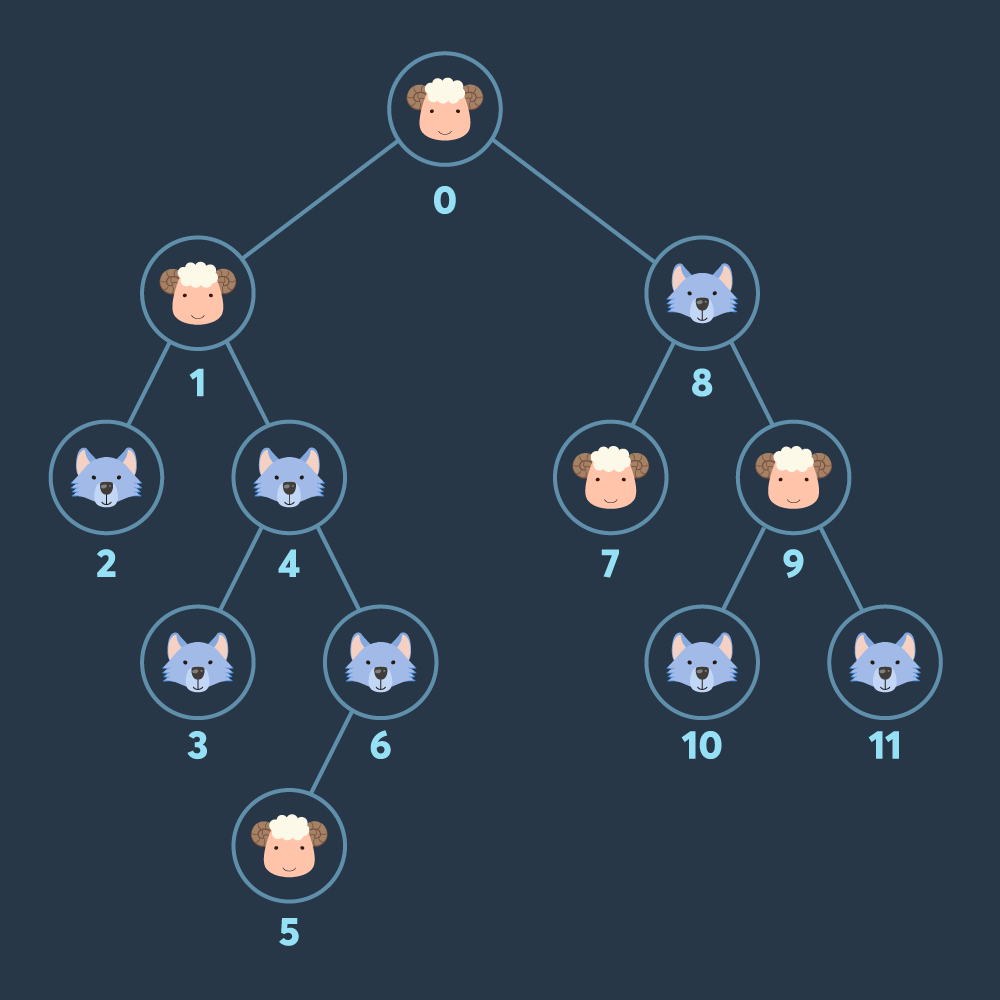

- info: 노드의 정보(양0/늑대1)
- edges: 이진트리 연결관계(부모, 자식)

dfs(현재 노드의 번호, 양의 수, 늑대의 수, 다음으로 방문할 수 있는 노드의 집합)

In [2]:
info = [0,0,1,1,1,0,1,0,1,0,1,1]
edges = [[0,1],[1,2],[1,4],[0,8],[8,7],[9,10],[9,11],[4,3],[6,5],[4,6],[8,9]]

In [11]:
def solution(info, edges):
    def next_node(v):
        tmp = []
        for e in edges:
            p, c = e # p: 부모노드, c: 자식노드
            if v == p: # 부모노드 번호 비교
                tmp.append(c)
        return tmp
    
    def dfs(sheep, wolf, current, path):
        # 지금 노드 확인, 양 늑대 판별
        if info[current]:
            wolf += 1
        else:
            sheep += 1
        # 늑대가 다 잡아먹음, 무시
        if sheep <= wolf:
            return 0
        # 아니라면 임시 변수에 값 갱신
        max_sheep = sheep

        for p in path:
            for n in next_node(p):
                if n not in path:
                    path.append(n)
                    # 최대 양 판별
                    max_sheep = max(max_sheep, dfs(sheep, wolf, n, path))
                    path.pop()
        return max_sheep
    
    answer = dfs(0,0,0,[0])
    
    return answer

In [12]:
solution(info, edges)

5

# 파괴되지 않은 건물

8시 10분 ~ 35분 (정확성)

## 문제 설명

- board: 건물의 내구도(2차원 배열) - 최대 1000
- skill: 공격/회복 스킬 - 최대 25만
    - type1: 공격
    - type2: 회복
- 최종적으로 <u>파괴되지 않은 건물의 개수</u>를 return

In [144]:
board = [[5,5,5,5,5],[5,5,5,5,5],[5,5,5,5,5],[5,5,5,5,5]]
skill = [[1,0,0,3,4,4],[1,2,0,2,3,2],[2,1,0,3,1,2],[1,0,1,3,3,1]]

In [145]:
def solution(board, skill):
    for i in skill:
        t, r1, c1, r2, c2, degree = i
        for i in range(r1, r2+1):
            for j in range(c1, c2+1):
                board[i][j] += degree if t == 2 else -degree
    cnt = 0
    for i in range(len(board)):
        for j in range(len(board[0])):
            if board[i][j] >= 1:
                cnt += 1
    return cnt

In [146]:
solution(board, skill)

10

## 문제 풀이
- https://kimjingo.tistory.com/155
- https://yiyj1030.tistory.com/489
- 비슷한 문제: https://www.acmicpc.net/problem/18246
- 누적합을 사용한 풀이
- $O(K + N * M)$으로 해결

In [134]:
def solution(board, skill):
    answer = 0
    tmp = [[0] * (len(board[0])+1) for _ in range(len(board)+1)] # 누적합 기록을 위한 배열
    
    for type, r1, c1, r2, c2, degree in skill:
        tmp[r1][c1] += degree if type == 2 else -degree
        tmp[r1][c2+1] += -degree if type == 2 else degree
        tmp[r2+1][c1] += -degree if type == 2 else degree
        tmp[r2+1][c2+1] += degree if type == 2 else -degree
        
    # 행 기준 누적합
    for i in range(len(tmp) - 1):
        for j in range(len(tmp[0])-1):
            tmp[i][j+1] += tmp[i][j]
            
    # 열 기준 누적합
    for j in range(len(tmp[0]) - 1):
        for i in range(len(tmp) - 1):
            tmp[i+1][j] += tmp[i][j]
            
    # 기존 배열과 합함
    for i in range(len(board)):
        for j in range(len(board[i])):
            board[i][j] += tmp[i][j]
            if board[i][j] > 0:
                answer += 1
                
    return answer

# 사라지는 발판